# MDSC-103 Assignment 1
#### Roll No. 22237 
#### Date: 17/09/22

In [41]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits import mplot3d

#  Gradient descent

In [42]:
def f(x):
    return x**2
def g(x):
    return 2*x
def grad_desc(lr,x0,e,niter):
    x=x0
    temp=0
    cond=True
    for i in range(niter):
        x1=x-lr*g(x0)
        print("x1= ",x1,"x0= ",x)
        temp=x
        x=x1
        cond=(temp - x1) <= e or x1 < lr
        if cond==False:
            continue
        else:
            break
    print()
    return round(x,10)

t=grad_desc(0.01,10,0.00001,550)
z = f(t)
print(f'Minima for the functions is at ({t},{z})')

x1=  9.8 x0=  10
x1=  9.600000000000001 x0=  9.8
x1=  9.400000000000002 x0=  9.600000000000001
x1=  9.200000000000003 x0=  9.400000000000002
x1=  9.000000000000004 x0=  9.200000000000003
x1=  8.800000000000004 x0=  9.000000000000004
x1=  8.600000000000005 x0=  8.800000000000004
x1=  8.400000000000006 x0=  8.600000000000005
x1=  8.200000000000006 x0=  8.400000000000006
x1=  8.000000000000007 x0=  8.200000000000006
x1=  7.800000000000007 x0=  8.000000000000007
x1=  7.600000000000007 x0=  7.800000000000007
x1=  7.400000000000007 x0=  7.600000000000007
x1=  7.200000000000006 x0=  7.400000000000007
x1=  7.000000000000006 x0=  7.200000000000006
x1=  6.800000000000006 x0=  7.000000000000006
x1=  6.600000000000006 x0=  6.800000000000006
x1=  6.400000000000006 x0=  6.600000000000006
x1=  6.2000000000000055 x0=  6.400000000000006
x1=  6.000000000000005 x0=  6.2000000000000055
x1=  5.800000000000005 x0=  6.000000000000005
x1=  5.600000000000005 x0=  5.800000000000005
x1=  5.400000000000005 x0=  5

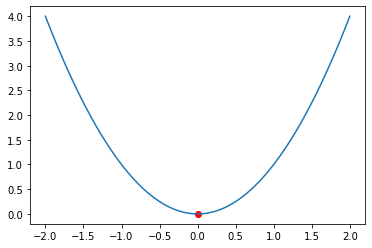

In [43]:
x=np.linspace(-2,2,100)
plt.plot(x,x**2)
plt.scatter(t,z,c='r')
plt.show()

# Golden section


In [46]:
def f(x):
    if 0<=x<=2:
        return 3*x
    elif 2<=x<=3:
        return (1/3)*(20-x)
    else:
        return 0
def gs(a,b,niter,err):
    if type(a)!=int or type(b)!=int:
        print('a,b is not an interval')
        return
    i=[a,b]
    xl=a
    xr=b
    g=0.618
    x1=0
    x2=0
    for j in range(niter):
        x1=xr-g*(xr-xl)
        x2=xl+g*(xr-xl)
        e = f(x1)
        e2=f(x2)
        if e<e2:
            xl=x1
            xr=xr
        elif e>e2:
            xl=xl
            xr=x2
        else:
            x1=xr-g*(xr-xl)
            x2=xl+g*(xr-xl)
            xl=x1
            xr=x2
        if abs(f(x1)-f(x2))<err:
            break
    return x1
w=gs(0,3,100,1e-10)
print('Maxima for f(x) is :',(w,f(w)))

Maxima for f(x) is : (2.0000000000522054, 5.999999999982599)


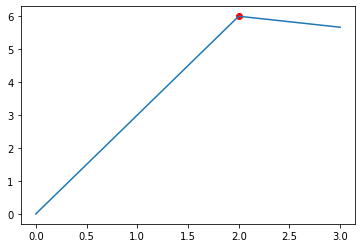

In [47]:
x=np.linspace(0,3,100)
y=[f(i) for i in x]
plt.plot(x,y)
plt.scatter(w,f(w),c='r')
plt.show()

# Newton-Raphson

In [52]:
import numpy as np
from scipy import linalg
def f(x1,x2):
    return x1**3+x2**3-3*x1*x2

def g(x1,x2):
    return np.array([[3*x1**2-3*x2],[3*x2**2-3*x1]])

def gj(x1,x2):
    return np.array([[6*x1,-3],[-3,6*x2]])

def pd(M):
    if M[0][0] > 0 and linalg.det(M) > 0:
        return 1
    elif M[0][0] < 0 and linalg.det(M) > 0:
        return 0
    else:
        return -1
    
def newton_raphson(xk,e,n):
    xk1 = np.array([[0],[0]])
    x1 = xk[0][0]
    x2 = xk[1][0]
    flag = 0
    
    for i in range(n):
        a = gj(x1,x2)
        xk1 = np.subtract(xk,linalg.inv(a)@g(x1,x2))
        x1 = xk1[0][0]
        x2 = xk1[1][0]
        xk = xk1
        if abs(x1-x2) < e:
            flag = 1
            break    
            
    if flag == 0:
        print("not convergible!!!") 
        return
    
    return xk1


a = np.array([[1],[2]])
b=newton_raphson(a,0.0001,500)
c=round(b[0][0],7)
d=round(b[1][0],7)
e = np.round(gj(c,d),10)
h = np.round(g(c,d),10)

print('Jacobian J(x1,x2) = \n',e,'\n')

if pd(e)==0:
    print(f"""for critical points x1 = {c}, x2 = {d}: 
The g(x1,x2) is = [{h[0]},{h[1]}]""")
    print(f"The Jacobian matrix is negative definite.({e[0][0]} < 0 and det(J) > 0)" )
    print(f"Hence, ({c},{d}) is the point of local maxima for f(x1,x2)")
    
elif pd(e)==1:
    print(f"for critical points x1 ={c}, x2 = {d}: the function value of g is = [{h[0]},{h[1]}]")
    print(f"The Jacobian matrix is positive definite. ({e[0][0]} > 0 and det(J) > 0)" )
    print(f"Hence, ({c},{d}) is the point of local minima for f(x1,x2)")
    
else:
    print(f"not determinable or saddle point" )

Jacobian J(x1,x2) = 
 [[ 6.0000078 -3.       ]
 [-3.         6.0000096]] 

for critical points x1 =1.0000013, x2 = 1.0000016: the function value of g is = [[3.e-06],[5.7e-06]]
The Jacobian matrix is positive definite. (6.0000078 > 0 and det(J) > 0)
Hence, (1.0000013,1.0000016) is the point of local minima for f(x1,x2)


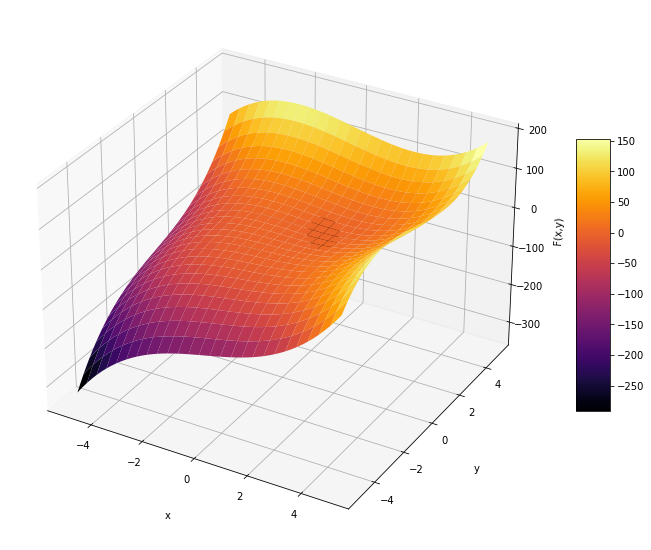

In [50]:
fig = plt.figure(figsize=(12,10))
ax = plt.axes(projection='3d')
ax.grid()
x = np.arange(-5,5.1,0.2)
y= np.arange(-5,5.1,0.2)
X, Y = np.meshgrid(x,y)
ax.set_xlabel('x', labelpad=20)
ax.set_ylabel('y', labelpad=20)
ax.set_zlabel('F(x,y)', labelpad=7)
surf = ax.plot_surface(X,Y,f(X,Y), cmap= plt.cm.inferno)
ax.scatter(c,d,f(c,d),marker='o', c = 'k', s = 1000)
fig.colorbar(surf, shrink=0.5, aspect=8)
plt.show()